### This is the exercise which my professor gave me to practice conventional neural network using keras

### in this exercise, I have to write a code to predict a face from image is happy or not happy. Reading training data in .h5 file to train the model.

In [2]:
import keras.backend as K
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def load_dataset():
    train_dataset = h5py.File('train_happy.h5', 'r')
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # the train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # the train set labels

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # the test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # the test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [5]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates the Keras model instance
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

## create the model.

In [6]:
happyModel = HappyModel((64, 64, 3))

## compile the model to configure the learning process.

In [7]:
happyModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## train the model.

In [8]:
happyModel.fit(x = X_train, y = Y_train, epochs = 40, batch_size = 1)

Epoch 1/40
600/600 [==============================] - 4s 6ms/step - loss: 2.3539 - accuracy: 0.7100
Epoch 2/40
600/600 [==============================] - 4s 6ms/step - loss: 0.8073 - accuracy: 0.8583
Epoch 3/40
600/600 [==============================] - 4s 7ms/step - loss: 0.5482 - accuracy: 0.8983
Epoch 4/40
600/600 [==============================] - 4s 6ms/step - loss: 0.3217 - accuracy: 0.9217
Epoch 5/40
600/600 [==============================] - 4s 6ms/step - loss: 0.2043 - accuracy: 0.9483
Epoch 6/40
600/600 [==============================] - 4s 7ms/step - loss: 0.3112 - accuracy: 0.9383
Epoch 7/40
600/600 [==============================] - 5s 8ms/step - loss: 0.2004 - accuracy: 0.9483
Epoch 8/40
600/600 [==============================] - 4s 7ms/step - loss: 0.1600 - accuracy: 0.9517
Epoch 9/40
600/600 [==============================] - 5s 8ms/step - loss: 0.1113 - accuracy: 0.9717
Epoch 10/40
600/600 [==============================] - 4s 7ms/step - loss: 0.1392 - accuracy: 0.9583

## test/evaluate the model.

In [9]:
### START CODE HERE ### (1 line)
preds = happyModel.predict(X_test)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))


Loss = [1.]
Test Accuracy = [0.00095937]


[[1.]]


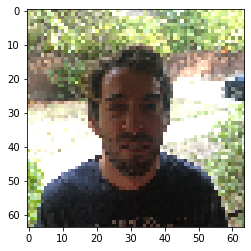

In [10]:
img_path = 'images/my_image.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

In [11]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0